In [1]:
# !pip install docling

In [2]:
from docling.document_converter import DocumentConverter

In [3]:
source = "/Users/ljoana/repos/LLMs-Journey/VLMs/ass_2.pdf"

In [4]:
converter = DocumentConverter()
result = converter.convert(source)

In [5]:
print(result.document.export_to_markdown())

<!-- formula-not-decoded -->

<!-- formula-not-decoded -->

- Er fly 14am
- I The characteristicfunction is given by Ox t Eleity When the moment generating functionexist we just showed it does exist or tkm the characteristic function and themoment generating function satisfy the following relationship Ox H Mx it

<!-- formula-not-decoded -->

- b We are interested in finding themoment generating function for W Or MWt Eletw get w Fw wld w The aim is to find Fw w

We are given that

- IN Exponential 7 730 72 z D e 72
- W E Z N N OZ F WIZ WIZ E E Z 0
- 230,720 LEE WEIR

<!-- formula-not-decoded -->

<!-- formula-not-decoded -->

<!-- formula-not-decoded -->

<!-- formula-not-decoded -->

<!-- formula-not-decoded -->

<!-- formula-not-decoded -->

probability

```
b Tn lad Mfd i Yn oc n Binomial hip Pyne 6 Ryn 4 1 p ca pin we have E Yi as and FEY EYE E ti LLM YT FM E Yi up as n is In tÉIi t.tn In f n p p as n as Oralso E Tna ELIE EGLI IF p var Tna var If varied nPf Pff lim E Tn x p and Gim

In [6]:
# !pip install -U mlx-vlm pillow docling-core transformers

In [7]:
from io import BytesIO
from pathlib import Path
from urllib.parse import urlparse

import requests
from docling_core.types.doc import ImageRefMode
from docling_core.types.doc.document import DoclingDocument, DocTagsDocument
from mlx_vlm import load
from mlx_vlm.prompt_utils import apply_chat_template
from mlx_vlm.utils import load_config, stream_generate
from PIL import Image


In [8]:
SHOW_IN_BROWSER = True  # Export output as HTML and open in webbrowser.

In [9]:
## Load the model
model_path = "ds4sd/SmolDocling-256M-preview-mlx-bf16"
model, processor = load(model_path)
config = load_config(model_path)

In [10]:
## Prepare input
prompt = "Convert this page to docling."

In [11]:
# image = "https://ibm.biz/docling-page-with-list"
# image = "https://ibm.biz/docling-page-with-table"
image = "sc_1.png"

# Load image resource
if urlparse(image).scheme != "":  # it is a URL
    response = requests.get(image, stream=True, timeout=10)
    response.raise_for_status()
    pil_image = Image.open(BytesIO(response.content))
else:
    pil_image = Image.open(image)

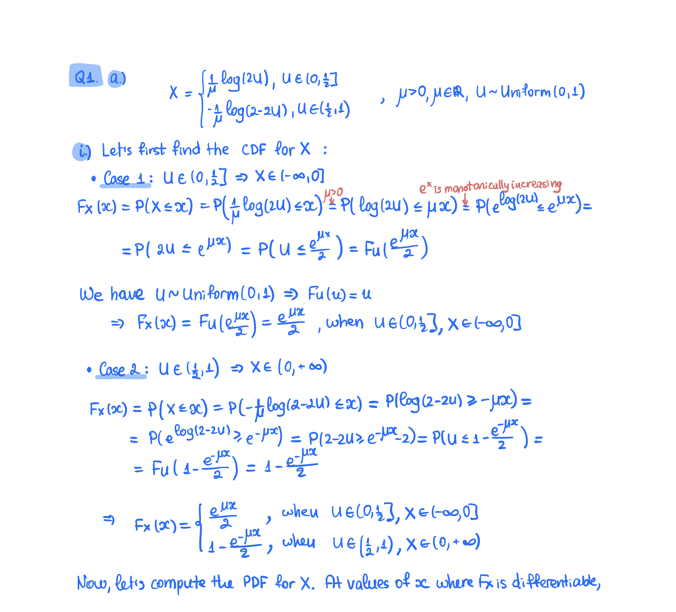

In [12]:
pil_image

In [13]:
# Apply chat template
formatted_prompt = apply_chat_template(processor, config, prompt, num_images=1)

## Generate output
print("DocTags: \n\n")

output = ""
for token in stream_generate(
    model, processor, formatted_prompt, [image], max_tokens=4096, verbose=False
):
    output += token.text
    print(token.text, end="")
    if "</doctag>" in token.text:
        break

print("\n\n")

DocTags: 




/Users/ljoana/.pyenv/versions/ml/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2718: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


 <doctag><text><loc_53><loc_55><loc_94><loc_74>Q 4. a)</text>
<text><loc_124><loc_55><loc_253><loc_102>X = { 1 log(2 u ) , u ∈ (0 , 1 2 1 ) , 1 2 log(2 - 2 u ) , u ∈ ( 1 4 1 ) , 1 2 log(2 - 2 u ) , u ∈ ( 1 4 1 )</text>
<unordered_list><list_item><loc_53><loc_113><loc_245><loc_135>i) Let's first find the cDF for X :</list_item>
<list_item><loc_66><loc_139><loc_245><loc_157>· Case 1: U ∈ (0 , 1 2 ) ⇒ X ∈ ( - 1 0 , 0 1 )</list_item>
</unordered_list>
<text><loc_54><loc_159><loc_438><loc_179>Fx ( x ) = P ( x ≤ x ) = P ( 1 4 log(2 u ) ≤ x ) 1 2 F ( x log(2 u ) ≤ µ x ) 1 2 P ( e log(2 u ) ≤ e µ x ) =</text>
<text><loc_89><loc_189><loc_315><loc_218>= P ( 2 u ≤ e µ x ) = P ( U ≤ e 2 2 ) = F u ( 1 2 2 )</text>
<text><loc_54><loc_231><loc_276><loc_251>We have U ∩ Uniform (0 , 1 4 ) ⇒ Fu ( u ) = u</text>
<text><loc_83><loc_254><loc_387><loc_275>⇒ Fx ( x ) = F u ( e µ x ) = e µ x 2 , when u ∈ (0 , 1 2 ) , x ∈ ( - 0 , 0 1 )</text>
<unordered_list><list_item><loc_63><loc_293><loc_242><loc_312>· Case

In [14]:
# Populate document
doctags_doc = DocTagsDocument.from_doctags_and_image_pairs([output], [pil_image])
# create a docling document
doc = DoclingDocument(name="SampleDocument")
doc.load_from_doctags(doctags_doc)


DoclingDocument(schema_name='DoclingDocument', version='1.3.0', name='SampleDocument', origin=None, furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], content_layer=<ContentLayer.FURNITURE: 'furniture'>, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>), body=GroupItem(self_ref='#/body', parent=None, children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/groups/0'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5'), RefItem(cref='#/texts/6'), RefItem(cref='#/texts/7'), RefItem(cref='#/groups/1'), RefItem(cref='#/texts/9'), RefItem(cref='#/texts/10'), RefItem(cref='#/texts/11'), RefItem(cref='#/texts/12'), RefItem(cref='#/texts/13')], content_layer=<ContentLayer.BODY: 'body'>, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>), groups=[UnorderedList(self_ref='#/groups/0', parent=RefItem(cref='#/body'), children=[RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3')], content_layer=<ContentLayer.BODY: 'body'>, name='lis

In [15]:
## Export as any format
# Markdown
print("Markdown: \n\n")
print(doc.export_to_markdown())

Markdown: 


Q 4. a)

X = { 1 log(2 u ) , u ∈ (0 , 1 2 1 ) , 1 2 log(2 - 2 u ) , u ∈ ( 1 4 1 ) , 1 2 log(2 - 2 u ) , u ∈ ( 1 4 1 )

- i) Let's first find the cDF for X :
- · Case 1: U ∈ (0 , 1 2 ) ⇒ X ∈ ( - 1 0 , 0 1 )

Fx ( x ) = P ( x ≤ x ) = P ( 1 4 log(2 u ) ≤ x ) 1 2 F ( x log(2 u ) ≤ µ x ) 1 2 P ( e log(2 u ) ≤ e µ x ) =

= P ( 2 u ≤ e µ x ) = P ( U ≤ e 2 2 ) = F u ( 1 2 2 )

We have U ∩ Uniform (0 , 1 4 ) ⇒ Fu ( u ) = u

⇒ Fx ( x ) = F u ( e µ x ) = e µ x 2 , when u ∈ (0 , 1 2 ) , x ∈ ( - 0 , 0 1 )

- · Case 2: U ∈ ( 1 4 , 1 4 ) ⇒ X ∈ ( 0 , + 0 0 )

Fx ( x ) = P ( x ≤ x ) = P ( - 1 0 log(2 - 2 u ) ≤ x ) = P (log(2 - 2 u ) ≥ - µ x ) = P ( e log(2 - 2 u ) ≥ e - µ x ) = P (2 - 2 u ≥ e - µ x ) = P (2 - 2 u ≥ e - µ x ) = F u ( 1 4 - 1 2 ) = 1 2

= Fu ( 1 4 - 1 2 ) = 1 2

⇒ Fx ( x ) = { 1 2 - 1 2 µ x , when u ∈ (0 , 1 2 ) , x ∈ ( - 0 , 0 1 ) } = Fx ( x ) = { 1 2 - 1 2 µ x , when u ∈ ( 1 2 , 1 4 ) , x ∈ (0 , + 0 0 ) }

Now, let's compute the PDF for X. At values of x where Fx is di GLY

In [16]:
# HTML
if SHOW_IN_BROWSER:
    import webbrowser

    out_path = Path("./output.html")
    doc.save_as_html(out_path, image_mode=ImageRefMode.EMBEDDED)
    webbrowser.open(f"file:///{str(out_path.resolve())}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
